In [51]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
import matplotlib.cm as cm

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# The Most important questions to answer

# 1.How does my Data Frame need to be structured for me to have the right X and Y axis?
# 2.How do I build a basic scatter plot?
# 3.How do I add a label to that scatter plot?" "Where would the labels for that scatter plot come from?


# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv(mouse_drug_data_to_load)
mouse_data
clinical_data = pd.read_csv(clinical_trial_data_to_load)
clinical_data

# Combine the data into a single dataset
combined_data = pd.merge(mouse_data, clinical_data, on = "Mouse ID")


# Display the data table for preview

combined_data


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [52]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

grouped_dt = combined_data.groupby(["Drug", "Timepoint"])

mean_tumor = grouped_dt["Tumor Volume (mm3)"].mean()

mean_tumor_df =  pd.DataFrame(mean_tumor)

mean_tumor_df.head()



Tumor Volume (mm3)
Drug      Timepoint                    
Capomulin 0                   45.000000
          5                   44.266086
          10                  43.084291
          15                  42.064317
          20                  40.716325

In [53]:
mean_tumor_volume_df = pd.DataFrame(mean_tumor_df["Tumor Volume (mm3)"])


#Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = mean_tumor_volume_df.sem()
se_tumor = pd.DataFrame(standard_error)
print(se_tumor)

mtv_df = mean_tumor_volume_df.reset_index()

mtv_df.set_index(["Timepoint"], inplace = True) 


mtv_df.head()

                           0
Tumor Volume (mm3)  0.898067


,Drug,Tumor Volume (mm3)
Timepoint,,
0,Capomulin,45.000000
5,Capomulin,44.266086
10,Capomulin,43.084291
15,Capomulin,42.064317
20,Capomulin,40.716325


In [54]:
# Minor Data Munging to Re-Format the Data Frames

Pivot_df = mtv_df.pivot(columns= "Drug", values = "Tumor Volume (mm3)")
Pivot_df


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


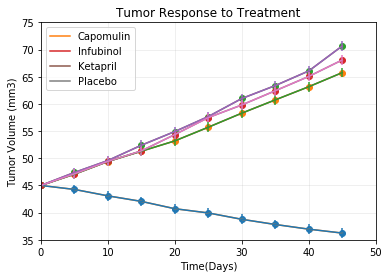

In [182]:
Timepoint = list(Pivot_df.index.values)

drug_list =  ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

print(drug_list) # <----- order in which the drugs appear

#color_list = iter(cm.rainbow(np.linspace(0, 1, len(drug_list))))

fig, ax = plt.subplots()

#print(standard_error)

for i in drug_list:
    y_axis1 = Pivot_df[i]
    x_axis1 = Timepoint
    Scatterplot = plt.scatter(x_axis1, y_axis1, marker="o")
    ax.errorbar(x_axis1, y_axis1, yerr = 0.898067)
    Lines = plt.plot(x_axis1, y_axis1)
    
x_limit = 50
plt.ylim(35, 75)
plt.xlim(0, x_limit)

plt.legend(labels =  ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])

plt.title("Tumor Response to Treatment")
plt.xlabel("Time(Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(alpha= .25)

#plt.legend (loc="best")

#plt.legend(handles=, loc="best")
#plt.legend()

#Add legand with colors manually <---------------

plt.show()

In [149]:

# Generate the Plot (with Error Bars)

# Save the Figure



In [57]:
# Show the Figure


## Metastatic Response to Treatment

In [58]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

mean_met = grouped_dt["Metastatic Sites"].mean()

# Convert to DataFrame

mean_met_df =  pd.DataFrame(mean_met)

# Preview DataFrame

mean_met_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [62]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

standard_error2 = mean_met_df.sem()
se_met = pd.DataFrame(standard_error2)
se_met

,0
Metastatic Sites,0.090044


In [60]:
# Minor Data Munging to Re-Format the Data Frames

mm_df = mean_met_df.reset_index()

mm_df.set_index(["Timepoint"], inplace = True) 


Pivot_met = mm_df.pivot(columns= "Drug", values = "Metastatic Sites")
Pivot_met

# Preview that Reformatting worked


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


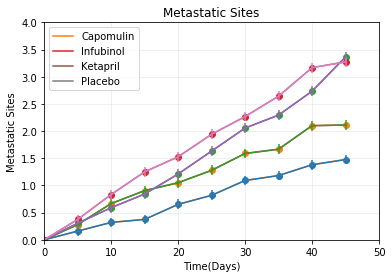

In [179]:
# Generate the Plot (with Error Bars)

Timepoint2 = list(Pivot_met.index.values)

drug_list2 =  combined_data["Drug"].unique()

print(drug_list) # <----- order in which the drugs appear

#color_list = iter(cm.rainbow(np.linspace(0, 1, len(drug_list))))

fig, ax = plt.subplots()
 
for i in drug_list:
    y_axis2 = Pivot_met[i]
    x_axis2 = Timepoint2
    Scatterplot2 = plt.scatter(x_axis2, y_axis2, marker="o")
    ax.errorbar(x_axis2, y_axis2, yerr = .090044)
    Lines2 = plt.plot(x_axis2, y_axis2)


x_limit2 = 50
plt.ylim(0, 4)
plt.xlim(0, x_limit2)


plt.title("Metastatic Sites")
plt.xlabel("Time(Days)")
plt.ylabel("Metastatic Sites")
plt.grid(alpha= .25)


plt.legend(labels =  ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])

plt.show()

# Save the Figure

# Show the Figure


## Survival Rates

In [71]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

mouse_count = grouped_dt["Mouse ID"].count()

# Convert to DataFrame
mouse_count_df =  pd.DataFrame(mouse_count)

count_df = pd.DataFrame(mouse_count)

# Preview DataFrame

mouse_count_df


Mouse ID
Drug      Timepoint          
Capomulin 0                25
          5                25
          10               25
          15               24
          20               23
          25               22
          30               22
          35               22
          40               21
          45               21
Ceftamin  0                25
          5                21
          10               20
          15               19
          20               18
          25               18
          30               16
          35               14
          40               14
          45               13
Infubinol 0                25
          5                25
          10               21
          15               21
          20               20
          25               18
          30               17
          35               12
          40               10
          45                9
...                       ...
Ramicane  0                25
          5                25
          10               24
          15               24
          20               23
          25               23
          30               23
          35               21
          40               20
          45               20
Stelasyn  0                26
          5                25
          10               23
          15               23
          20               21
          25               19
          30               18
          35               16
          40               12
          45               11
Zoniferol 0                25
          5                24
          10               22
          15               21
          20               17
          25               16
          30               15
          35               14
          40               14
          45               14

[100 rows x 1 columns]

In [72]:
# Minor Data Munging to Re-Format the Data Frames

mc_df = mouse_count_df.reset_index()

mc_df.set_index(["Timepoint"], inplace = True) 

count_df = count_df.reset_index()

count_df.set_index(["Drug"], inplace = True)

count_df2 = pd.DataFrame(count_df)

count_df2
#print(mc_df)


Pivot_mc = mc_df.pivot(columns= "Drug", values = "Mouse ID")
Pivot_mc

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [73]:
# Minor Data Munging to Re-Format the Data Frames

mc_df = mouse_count_df.reset_index()

mc_df.set_index(["Timepoint"], inplace = True) 


Pivot_mc = mc_df.pivot(columns= "Drug", values = "Mouse ID")
Pivot_mc

mc_per = []

for i in drug_list:
    Pivot_mc[i] = Pivot_mc[i]/25
    mc_per.append(Pivot_mc[i])  
        
mc_per
mc_per_df = pd.DataFrame(mc_per)

mc_per_df

mc_t = pd.DataFrame(mc_per_df.T)

print(mc_t)


           Capomulin  Infubinol  Ketapril  Placebo
Timepoint                                         
0               1.00       1.00      1.00     1.00
5               1.00       1.00      0.92     0.96
10              1.00       0.84      0.88     0.96
15              0.96       0.84      0.76     0.80
20              0.92       0.80      0.76     0.76
25              0.88       0.72      0.76     0.68
30              0.88       0.68      0.72     0.60
35              0.88       0.48      0.68     0.56
40              0.84       0.40      0.60     0.48
45              0.84       0.36      0.44     0.44


['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


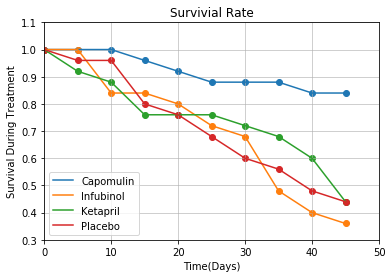

In [175]:
# Generate the Plot (with Error Bars)

print(drug_list) # <----- order in which the drugs appear

for i in drug_list:
    y_axis3 = mc_t[i]
    x_axis3 = Timepoint2 
    Scatterplot3 = plt.scatter(x_axis3, y_axis3, marker="o" )
    
    Lines3 = plt.plot(x_axis3, y_axis3)

x_limit3 = 50
plt.ylim(.3, 1.1,.1)
plt.xlim(0, x_limit3)

plt.legend(labels =  ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'])

plt.title("Survivial Rate")
plt.xlabel("Time(Days)")
plt.ylabel("Survival During Treatment")
plt.grid(alpha= .75)



# Show the Figure
plt.show()

In [75]:
Pivot_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


## Summary Bar Graph

In [76]:
# Calculate the percent changes for each drug

changes_df = Pivot_df[["Capomulin","Infubinol", "Ketapril", "Placebo"]]

Capomulin_0 = changes_df.loc[(0, "Capomulin")]
Capomulin_45 = changes_df.loc[(45, "Capomulin")]
Capomulin = (100-(Capomulin_45/Capomulin_0)*100)*-1
Capomulin

Infubinol_0 = changes_df.loc[(0, "Infubinol")]
Infubinol_45 = changes_df.loc[(45, "Infubinol")]
Infubinol = (100-(Infubinol_45/Infubinol_0)*100)*-1
Infubinol

Ketapril_0 = changes_df.loc[(0, "Ketapril")]
Ketapril_45 = changes_df.loc[(45, "Ketapril")]
Ketapril = (100-(Ketapril_45/Ketapril_0)*100)*-1
Ketapril

Placebo_0 = changes_df.loc[(0, "Placebo")]
Placebo_45 = changes_df.loc[(45, "Placebo")]
Placebo = (100-(Placebo_45/Placebo_0)*100)*-1
Placebo

Drug_just_nums = [Capomulin,Infubinol,Ketapril,Placebo]

Drug_changes = [{"Capomulin": Capomulin, "Infubinol": Infubinol,"Ketapril": Ketapril,"Placebo":Placebo}]

Drug_changes_df = pd.DataFrame(Drug_changes)
Drug_changes_df



# Display the data to confirm


,Capomulin,Infubinol,Ketapril,Placebo
0,-19.475303,46.123472,57.028795,51.29796


Text(15.0, 15, 'HELLLO')

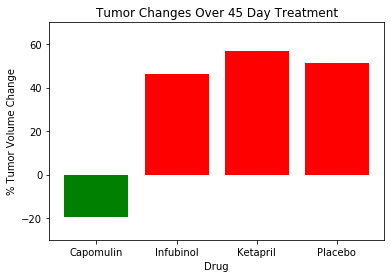

In [189]:
x_axis4 = np.arange(len(Drug_just_nums))
y_axis4 = Drug_just_nums

colors = ['g' if ( y< 0) else 'r' for y in y_axis4]

plt.bar(x_axis4, y_axis4, color=colors, )

#ax.text(y_axis4 + 1 / 2, y_axis - 5, label)

tick_locations = [value for value in x_axis4]
plt.xticks(tick_locations, drug_list)
plt.title("Tumor Changes Over 45 Day Treatment")
plt.xlabel("Drug")
plt.ylabel("% Tumor Volume Change")
#plt.grid(alpha= .75)
plt.ylim(-30, 70, 20)


In [78]:
In this clinical trial, ten different drugs were given to 250 mice in order to find the best
treatment to squamous cell carcinoma (SCC) which causes skin cancer. Out of the ten, three 
drugs (Capomulin, Infubinol, Ketapril) and a placebo were singled out for analysis of 
effectiveness at reducing tumor volumes over a 45 day period and increasing metastatic spread.

The first analysis shows that Infubinol and Ketapril increased from 45 (mm3) to 65-70 (mm3).
There was no significant difference on day 45 between Infubinol and Ketapril to the Placebo.
Capomulini was the one drug that lowered the tumor volume from 45 (mm3) to 36 (mm3). In this
analysis, Capomulin was the most effective at reducing tumor volume. 

The aim of the second analysis showed that Ketapril had no significant difference between its
Metastatic Spread and that of the Placebo. Capomulin caused about ~50% the amount of spread of
Ketapril and the Placebo. Infubinol lead to ~75% of Metastatic Spread compared to Ketapril and
the Placebo. Capomulin again shows that it is most effective at reducing the symptoms of SCC.

The last analysis looked at what percentage of mice were still alive after the 45 day period.
Capomulin had the highest survival rate at 83% at day 45. Ketapril and the placebo had a 
survival rate of 45% and Infubinol had a survival rate of 35%. For all 3 studies Capomulin 
shows that it leads to the best results in fighting SSC. 


# Show the Figure
fig.show()